## Knock Airport Weather

The first part of assignement is to:

 - plot the temperature
 - plot the mean temperature each day
 - plot the mean temperature for each month

In [173]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [174]:
weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
weather.head(5)

C:\Users\siklo\AppData\Local\Temp\ipykernel_11040\3960660838.py:1: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [175]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    247674 non-null  object 
 1   ind     247674 non-null  int64  
 2   rain    247674 non-null  object 
 3   ind.1   247674 non-null  int64  
 4   temp    247674 non-null  float64
 5   ind.2   247674 non-null  int64  
 6   wetb    247674 non-null  float64
 7   dewpt   247674 non-null  float64
 8   vappr   247674 non-null  float64
 9   rhum    247674 non-null  int64  
 10  msl     247674 non-null  object 
 11  ind.3   247674 non-null  int64  
 12  wdsp    247674 non-null  object 
 13  ind.4   247674 non-null  int64  
 14  wddir   247674 non-null  object 
 15  ww      247674 non-null  object 
 16  w       247674 non-null  object 
 17  sun     247674 non-null  float64
 18  vis     247674 non-null  object 
 19  clht    247674 non-null  object 
 20  clamt   247674 non-null  object 
dtypes: float64

I want to rename the columns.

In [176]:
weather.columns = ['Date-Time (utc)','Indicator', 'Rain (mm)', 'Indicator1', 'Air-Temp (°C)', 'Indicator2', 'WetBulb-Temp (°C)', 'DewPoint-Temp (°C)', 'VapourPress (hPa)', 'RelHumid (%)', 'MeanSeaLevel-Press (hPa)', 'Indicator3', 'MeanWindSpped (knot)', 'Indicator4', 'PredomWindDirection (degree)', 'Synopcode-PresentWeather', 'Synopcode-PastWeather', 'Sunshine (hours)', 'Visibility (m)', 'CloudHeigh', 'CloundAmount']
weather.head()

,Date-Time (utc),Indicator,Rain (mm),Indicator1,Air-Temp (°C),Indicator2,WetBulb-Temp (°C),DewPoint-Temp (°C),VapourPress (hPa),RelHumid (%),...,Indicator3,MeanWindSpped (knot),Indicator4,PredomWindDirection (degree),Synopcode-PresentWeather,Synopcode-PastWeather,Sunshine (hours),Visibility (m),CloudHeigh,CloundAmount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [177]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date-Time (utc)               247674 non-null  object 
 1   Indicator                     247674 non-null  int64  
 2   Rain (mm)                     247674 non-null  object 
 3   Indicator1                    247674 non-null  int64  
 4   Air-Temp (°C)                 247674 non-null  float64
 5   Indicator2                    247674 non-null  int64  
 6   WetBulb-Temp (°C)             247674 non-null  float64
 7   DewPoint-Temp (°C)            247674 non-null  float64
 8   VapourPress (hPa)             247674 non-null  float64
 9   RelHumid (%)                  247674 non-null  int64  
 10  MeanSeaLevel-Press (hPa)      247674 non-null  object 
 11  Indicator3                    247674 non-null  int64  
 12  MeanWindSpped (knot)          247674 non-nul

I need to convert the 'Date-Time' column to a datetime object.

In [178]:
weather['Date-Time (utc)'] = pd.to_datetime(weather['Date-Time (utc)'], format='%d-%b-%Y %H:%M')
print(weather['Date-Time (utc)'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: Date-Time (utc), Length: 247674, dtype: datetime64[ns]


### Plotting the Date vs Air Temperature.

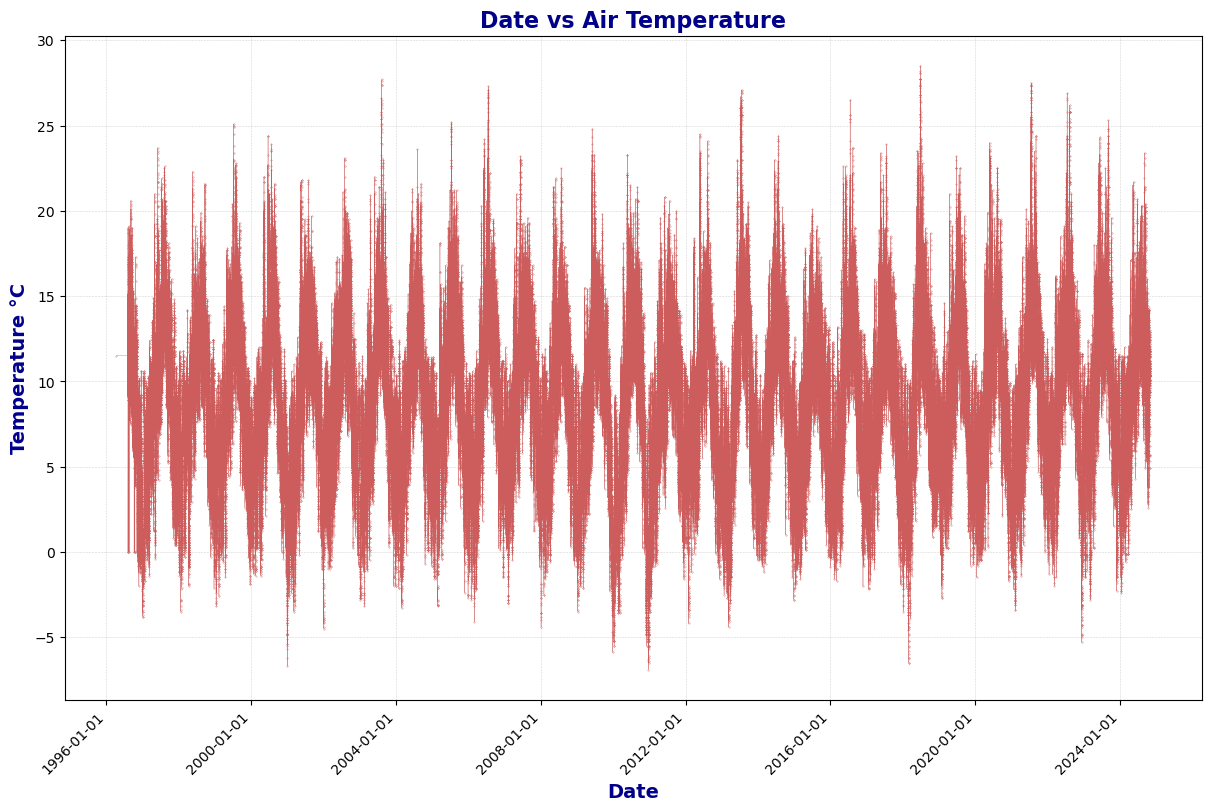

In [179]:
fig, ax = plt.subplots (figsize =(12,8), layout = "constrained")

ax.plot( weather['Date-Time (utc)'], weather['Air-Temp (°C)'], color ="indianred", marker =".", markersize = .5, linewidth= .25)

ax.set_title("Date vs Air Temperature", color ='darkblue', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkblue', fontsize = 14, fontweight='bold')
ax.set_ylabel("Temperature °C", color ='darkblue', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') # setting up the date, no hours
ax.xaxis.set_major_formatter(mfmt)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### Plotting average Air Temperature vs Date.

In [180]:
avtemp = weather.groupby(['Date-Time (utc)'])['Air-Temp (°C)'].mean() #finding average temperature
print (avtemp)

Date-Time (utc)
1996-04-10 14:00:00    11.5
1996-07-31 08:00:00    11.5
1996-07-31 09:00:00    11.6
1996-07-31 10:00:00    12.9
1996-07-31 11:00:00    14.5
                       ... 
2024-10-31 20:00:00    10.1
2024-10-31 21:00:00    10.1
2024-10-31 22:00:00    10.0
2024-10-31 23:00:00     9.8
2024-11-01 00:00:00     9.7
Name: Air-Temp (°C), Length: 247674, dtype: float64


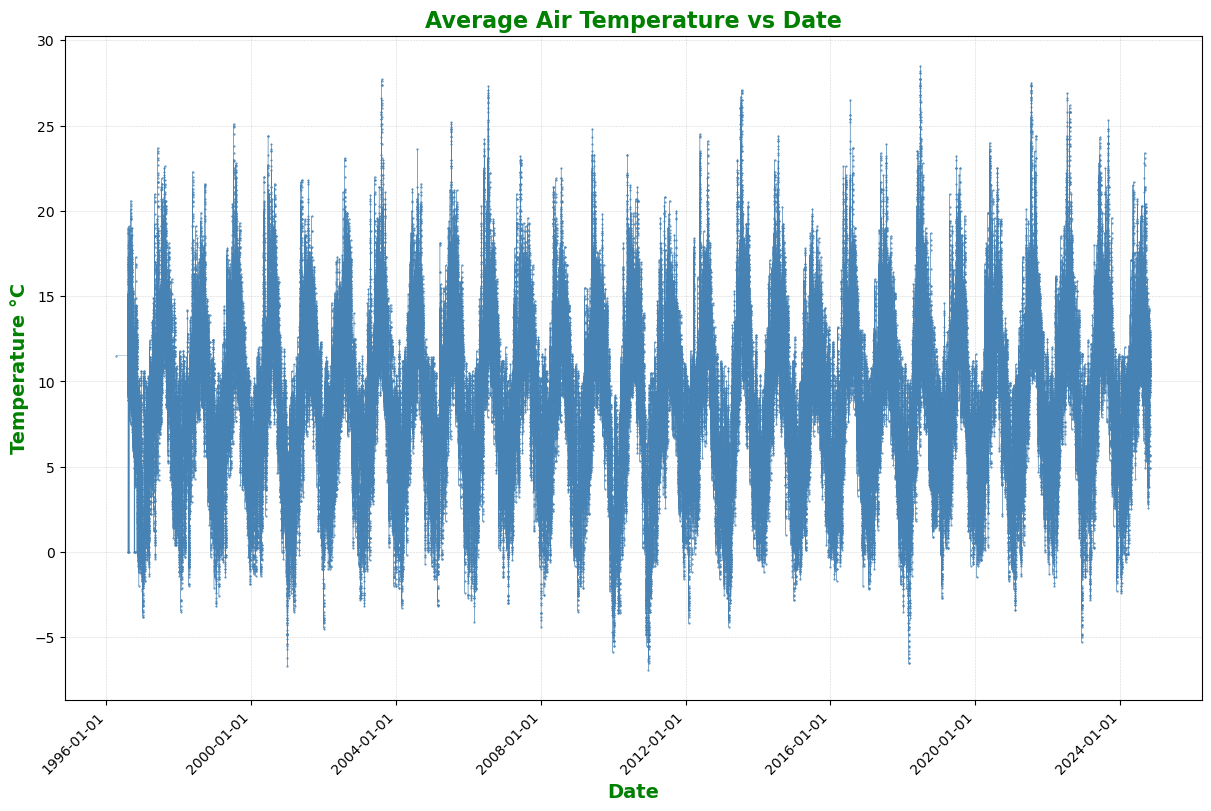

In [181]:
fig, ax = plt.subplots (figsize =(12,8), layout = "constrained")

ax.plot( avtemp, color ="steelblue", marker ="o", markersize = .5, linewidth= .25)

ax.set_title("Average Air Temperature vs Date", color ='green', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='green', fontsize = 14, fontweight='bold')
ax.set_ylabel("Temperature °C", color ='green', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') # setting up the date, no hours
ax.xaxis.set_major_formatter(mfmt)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### Average temperature per day for certain period.

In [182]:
start_date = "2020-01-01 01:00:00" #setting up start date
end_date = "2023-01-01 01:00:00"   #setting up end date

average_daily_temp = weather.set_index('Date-Time (utc)')['Air-Temp (°C)'].resample('D').mean() #setting the index as datetime and resampling per day
print (average_daily_temp)

Date-Time (utc)
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2024-10-28    11.487500
2024-10-29    10.445833
2024-10-30    10.983333
2024-10-31    10.554167
2024-11-01     9.700000
Freq: D, Name: Air-Temp (°C), Length: 10433, dtype: float64


In [183]:
data_daily_temp = average_daily_temp.loc[start_date:end_date] # showing last 5 records of set period
print(data_daily_temp.tail(5))

Date-Time (utc)
2022-12-28    5.166667
2022-12-29    4.245833
2022-12-30    5.154167
2022-12-31    2.945833
2023-01-01    2.983333
Freq: D, Name: Air-Temp (°C), dtype: float64


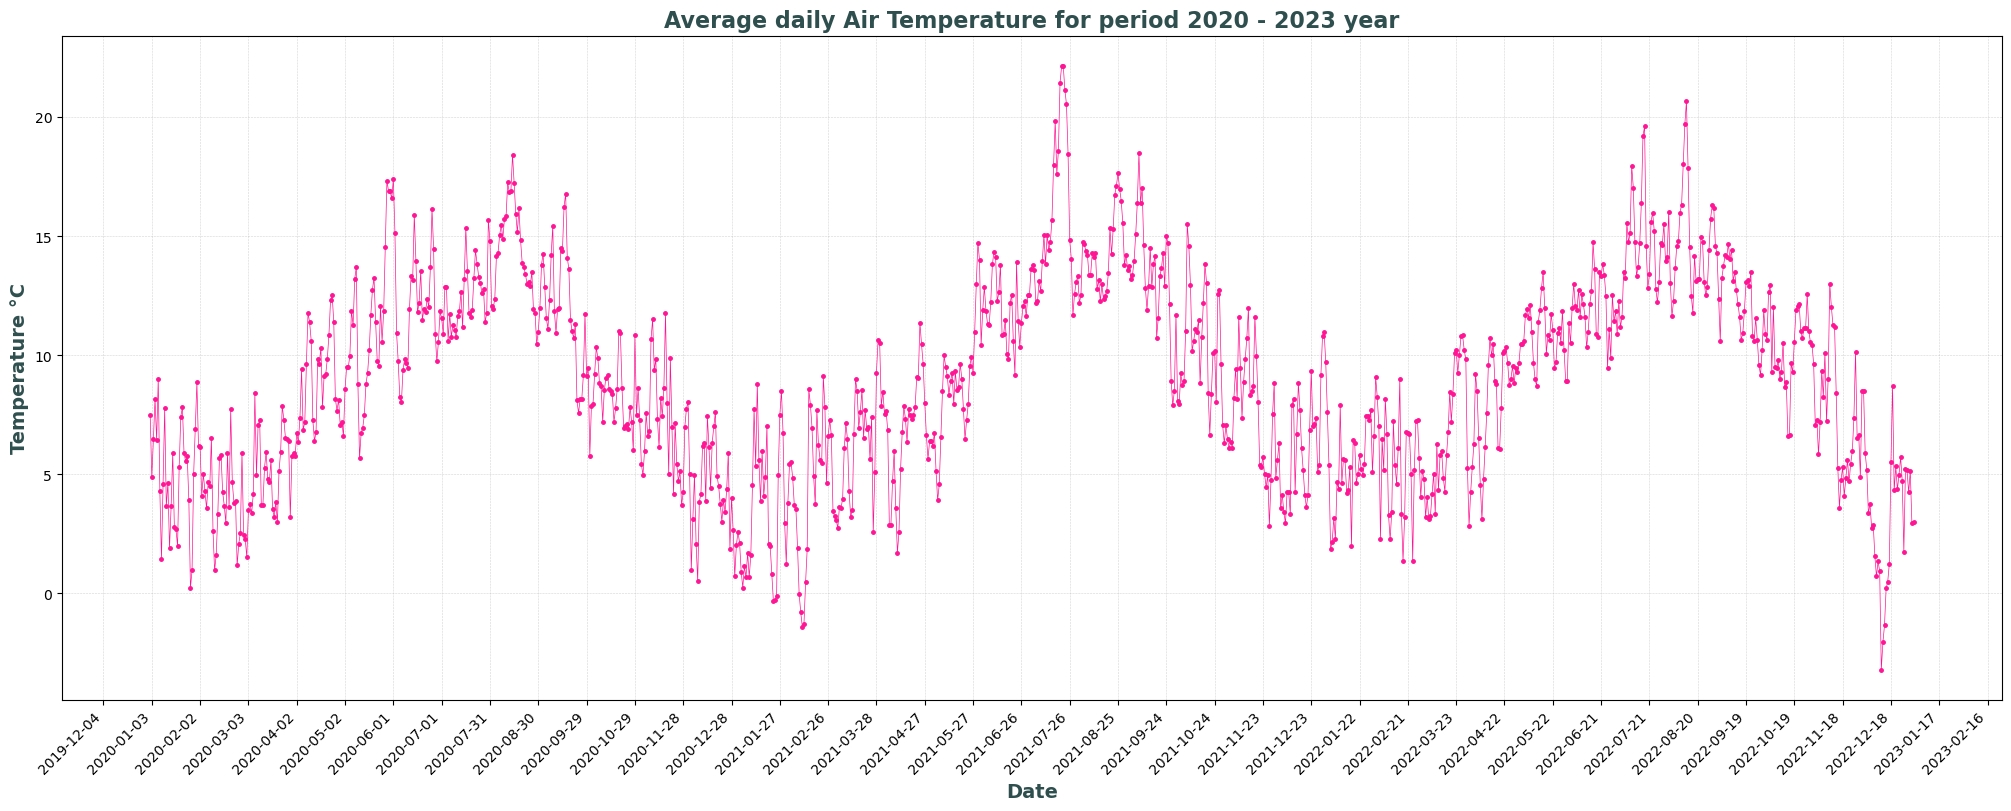

In [184]:
fig, ax = plt.subplots (figsize =(20,8), layout = "constrained")

ax.plot( data_daily_temp, color ="deeppink", marker ="o", markersize = 2.5, linewidth= .50)

ax.set_title("Average daily Air Temperature for period 2020 - 2023 year", color ='darkslategray', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.set_ylabel("Temperature °C", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') # setting up the date, no hours
ax.xaxis.set_major_formatter(mfmt)

xloc = md.DayLocator(interval= 30) # setting up major locator after 30 days
ax.xaxis.set_major_locator(xloc)
#ax.xaxis.set_minor_locator(md.DayLocator()) # minor locator is set for every day
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### Average monthly temperature for certain period.

In [185]:
average_monthly_temp = weather.set_index('Date-Time (utc)')['Air-Temp (°C)'].resample('M').mean() #setting the index as datetime and resampling per month
print (average_monthly_temp)

Date-Time (utc)
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2024-07-31    12.994489
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     9.966263
2024-11-30     9.700000
Freq: M, Name: Air-Temp (°C), Length: 344, dtype: float64


In [186]:
data_monthly_temp = average_monthly_temp.loc[start_date:end_date]
print(data_monthly_temp.tail(5))

Date-Time (utc)
2022-08-31    14.739382
2022-09-30    12.320972
2022-10-31    10.350403
2022-11-30     7.369722
2022-12-31     3.242204
Freq: M, Name: Air-Temp (°C), dtype: float64


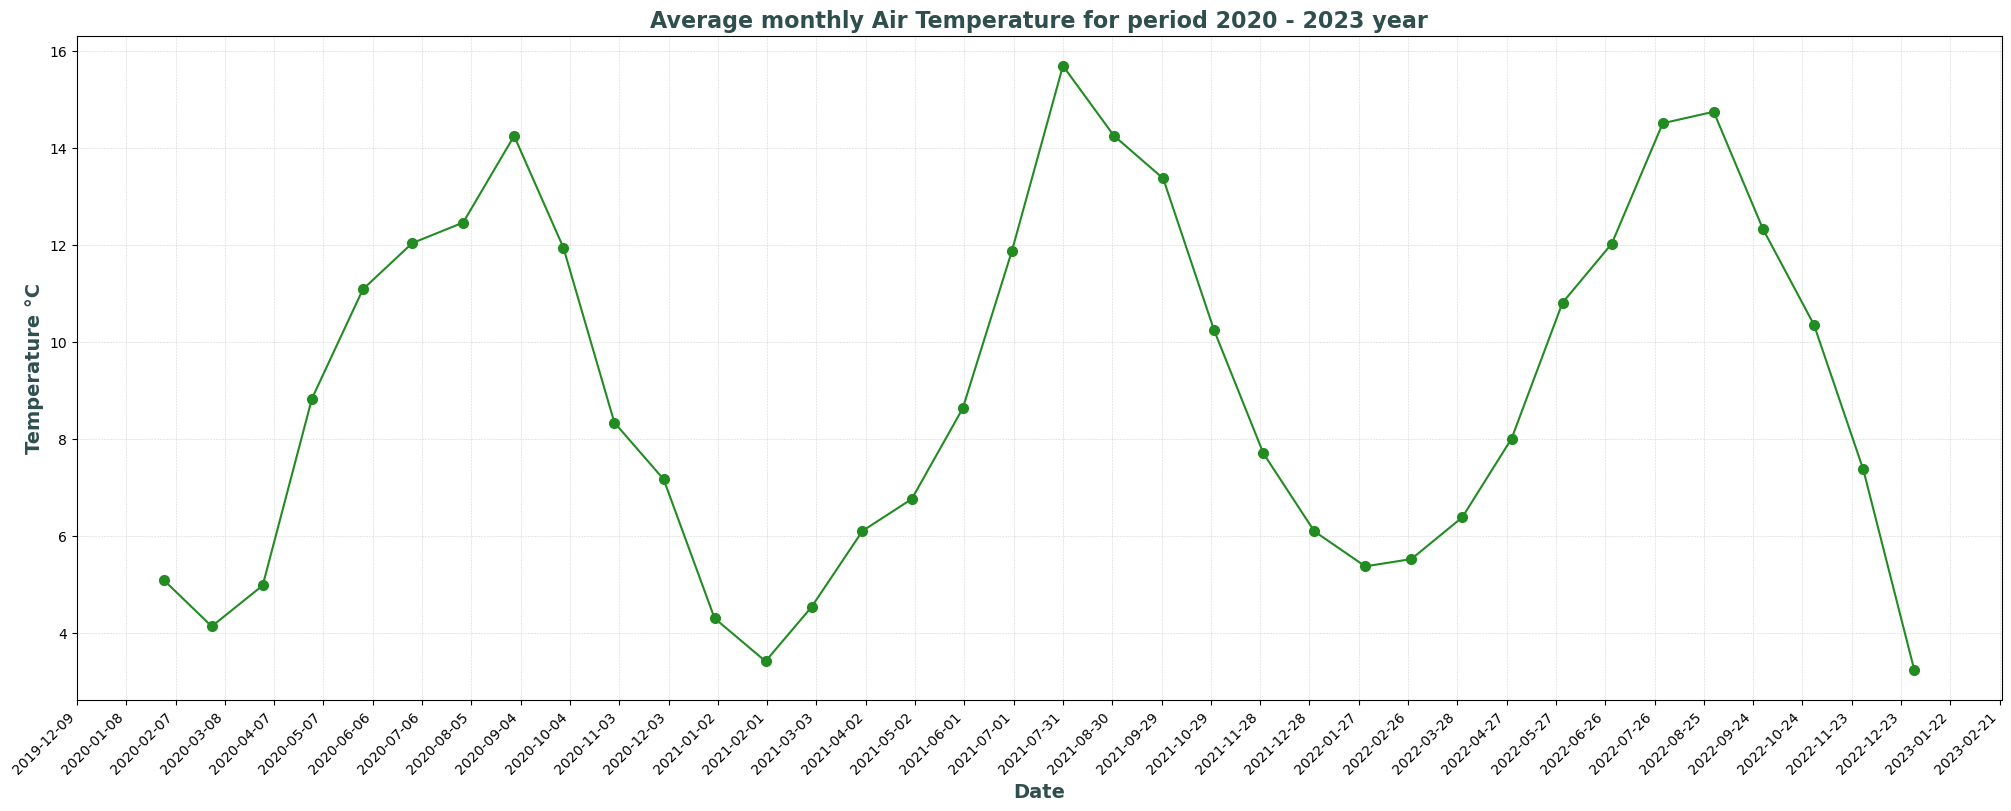

In [187]:
fig, ax = plt.subplots (figsize =(20,8), layout = "constrained")

ax.plot( data_monthly_temp, color ="forestgreen", marker ="o", markersize = 7, linewidth= 1.5)

ax.set_title("Average monthly Air Temperature for period 2020 - 2023 year", color ='darkslategray', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.set_ylabel("Temperature °C", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') # setting up the date, no hours
ax.xaxis.set_major_formatter(mfmt)

xloc = md.DayLocator(interval= 30) # setting up major locator after 30 days
ax.xaxis.set_major_locator(xloc)
#ax.xaxis.set_minor_locator(md.DayLocator()) # minor locator is set for every day
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

The second part of assignement is to:

 - plot the Windspeed (there is data missing from this column)
 - plot the rolling Windspeed (over 24 hours)
 - plot the max Windspeed for each day
 - plot the monthly mean of the daily max Windspeed

### Plotting the Windspeed vs Date.

As there are some data missing, first check this out.

In [188]:
weather['MeanWindSpped (knot)'].str.isspace().sum() #I used the 'str.isspace()' to check for any whitespaces in column Windspeed.

50

Looks like we have 50 records with the whitespaces on the Windspeed Column.

I will removed them all.

In [189]:
weather_filtered = weather[weather['MeanWindSpped (knot)'] != ' '] # I used the boolean mask to idetify records with the empty string in the Windspeed column.
                                                                   # using the "!= '' " operater removed the empty records and resuts are stored in new dataframe.


In [190]:
weather_filtered['MeanWindSpped (knot)'].str.isspace().sum() #checking if all whitespaces are removed now

0

Looks like all whitespase are removed, but I still have records which has zero value as per below.

In [191]:
weather_filtered['MeanWindSpped (knot)']

0         0
1         0
2         0
3         0
4         0
         ..
247669    5
247670    5
247671    4
247672    6
247673    6
Name: MeanWindSpped (knot), Length: 247624, dtype: object

In [192]:
weather_filtered['MeanWindSpped (knot)'].eq(0).sum() #I want to find out how many records with zero value are there.

128

In [193]:
weather_filtered = weather_filtered[weather_filtered['MeanWindSpped (knot)'] != 0] #removing all zero values

In [194]:
weather_filtered['MeanWindSpped (knot)'].eq(0).sum() #checking if any zero left

0

In [195]:
weather_filtered['MeanWindSpped (knot)'] = pd.to_numeric(weather_filtered['MeanWindSpped (knot)'], errors='coerce') #as the wind speed column was an object type, I need to convert it to the float type

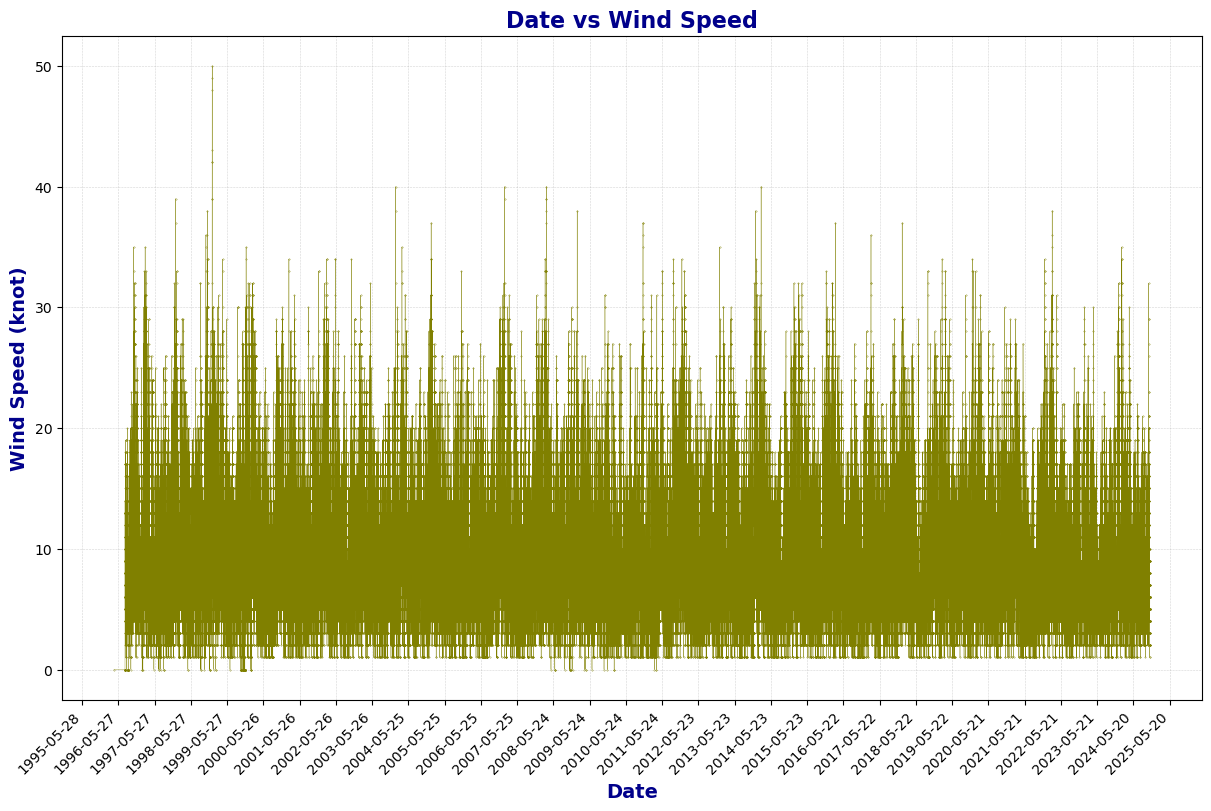

In [196]:
fig, ax = plt.subplots (figsize =(12,8), layout = "constrained")

ax.plot(weather_filtered['Date-Time (utc)'], weather_filtered['MeanWindSpped (knot)'], color ="olive", marker =".", markersize = .5, linewidth= .25)

ax.set_title("Date vs Wind Speed", color ='darkblue', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkblue', fontsize = 14, fontweight='bold')
ax.set_ylabel("Wind Speed (knot)", color ='darkblue', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') 
ax.xaxis.set_major_formatter(mfmt)

xloc = md.DayLocator(interval= 365) # setting up major locator after 365 days
ax.xaxis.set_major_locator(xloc)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### Plotting the Windspeed rolling over 24 hours.

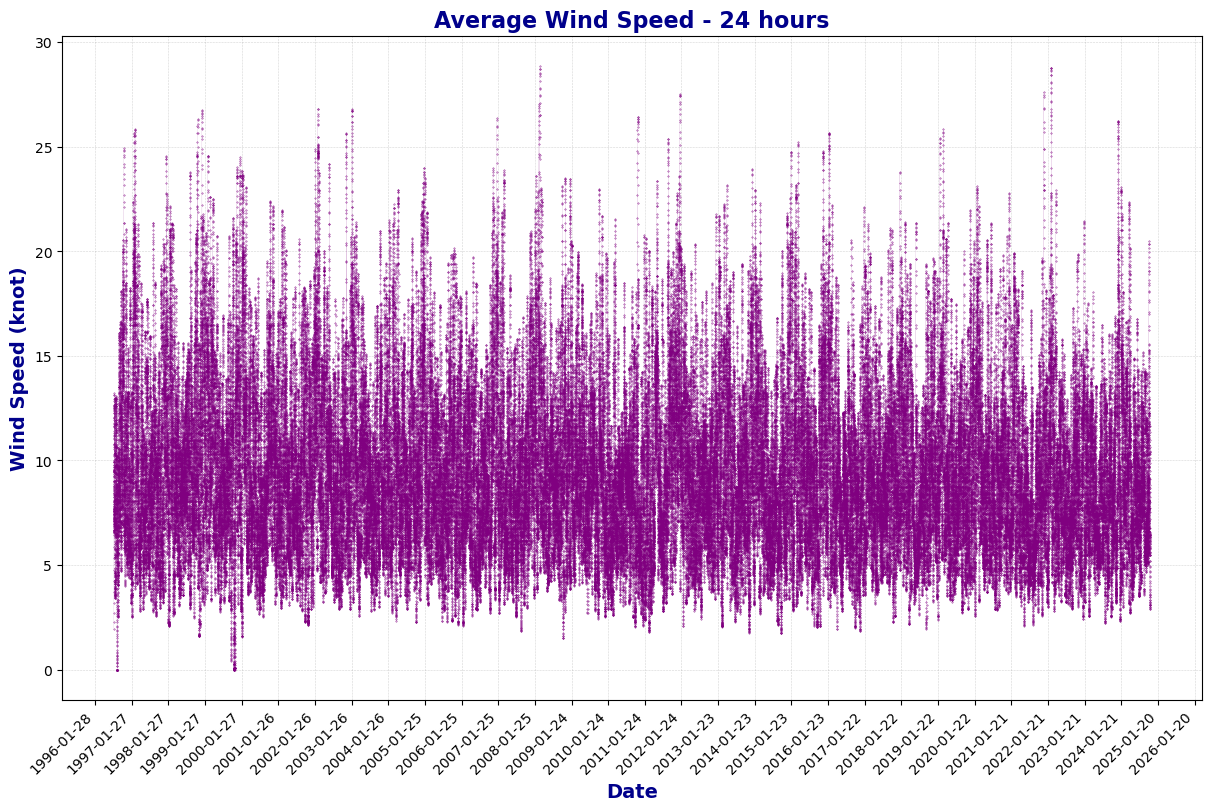

In [197]:
#I will created new column for 24 hours rolling results
weather_filtered['24_WindSpeed'] = weather_filtered['MeanWindSpped (knot)'].rolling(24).mean()

fig, ax = plt.subplots (figsize =(12,8), layout = "constrained")

ax.plot(weather_filtered['Date-Time (utc)'], weather_filtered['24_WindSpeed'], color ="purple", marker =".", markersize = .6, linewidth= .05)

ax.set_title("Average Wind Speed - 24 hours", color ='darkblue', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkblue', fontsize = 14, fontweight='bold')
ax.set_ylabel("Wind Speed (knot)", color ='darkblue', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') 
ax.xaxis.set_major_formatter(mfmt)

xloc = md.DayLocator(interval= 365) # setting up major locator after 365 days
ax.xaxis.set_major_locator(xloc)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()


### Plotting the maximum daily Windspeed.

In [198]:
# I need to calculate the maximum daily figure, but before I need to set the 'Date' as an index
weather_filtered.set_index('Date-Time (utc)', inplace=True)
maxd_WindSpeed = weather_filtered['MeanWindSpped (knot)'].resample('D').max()
print(maxd_WindSpeed)

Date-Time (utc)
1996-04-10     0.0
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
              ... 
2024-10-28    14.0
2024-10-29     6.0
2024-10-30     9.0
2024-10-31     9.0
2024-11-01     6.0
Freq: D, Name: MeanWindSpped (knot), Length: 10433, dtype: float64


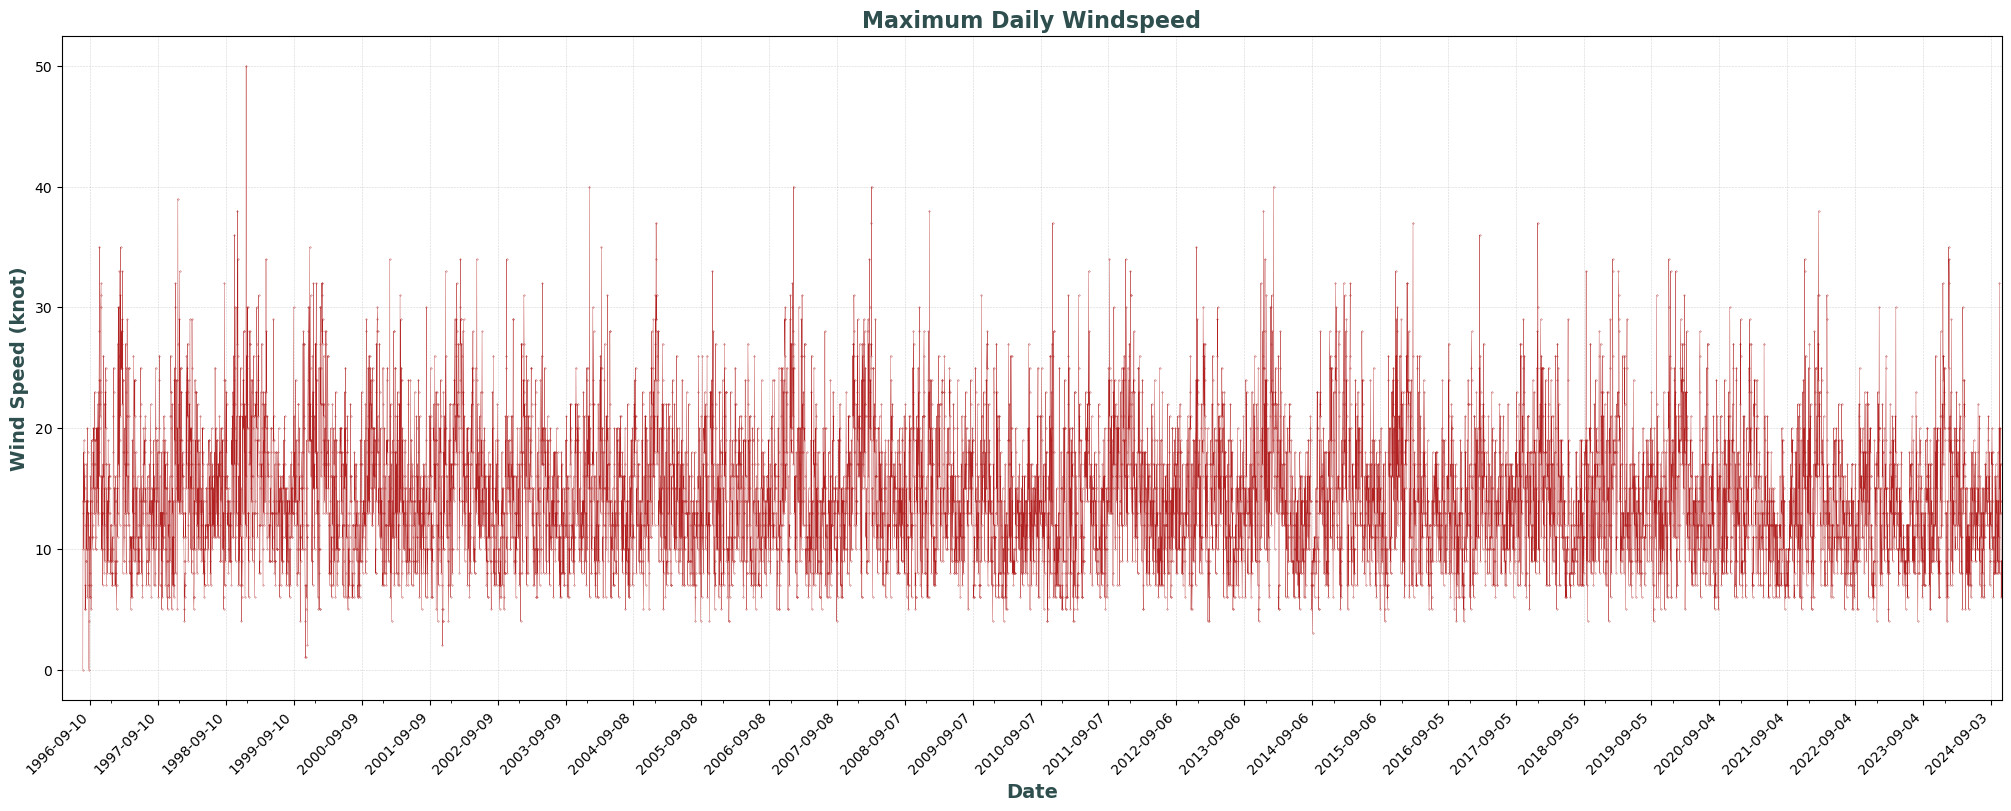

In [202]:
fig, ax = plt.subplots (figsize =(20,8), layout = "constrained")

maxd_WindSpeed.plot(color ="firebrick", marker =".", markersize = .5, linewidth= .25)

ax.set_title("Maximum Daily Windspeed", color ='darkslategray', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.set_ylabel("Wind Speed (knot)", color ='darkslategray', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') 
ax.xaxis.set_major_formatter(mfmt)

xloc = md.DayLocator(interval= 365) # setting up major locator after 365 days
ax.xaxis.set_major_locator(xloc)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### Plotting the mean of maximum daily Windspeed.

In [200]:
#I am resampling to get the monthly figure of the maximum dayily windspeed.
meand_WindSpeed = maxd_WindSpeed.resample('M').mean()
print (meand_WindSpeed)

Date-Time (utc)
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
                ...    
2024-07-31    11.483871
2024-08-31    14.451613
2024-09-30    12.266667
2024-10-31    13.064516
2024-11-30     6.000000
Freq: M, Name: MeanWindSpped (knot), Length: 344, dtype: float64


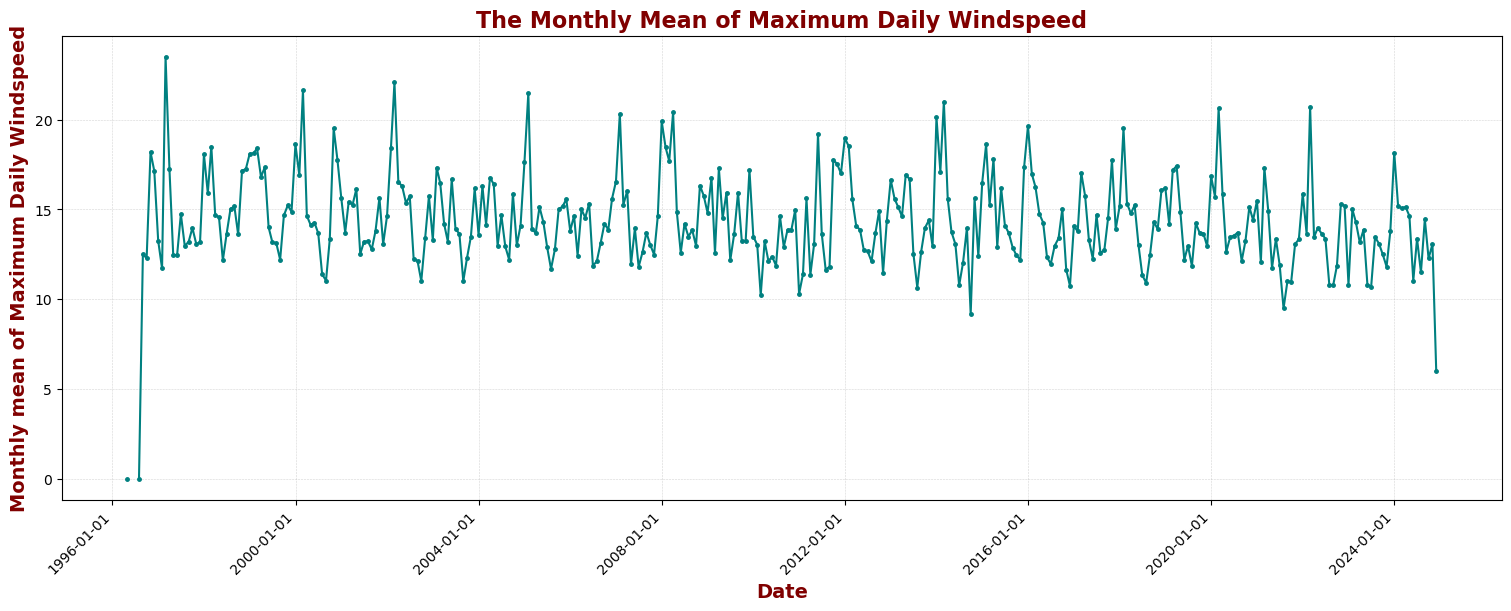

In [201]:
#I will use the dates on the x and mean values on the y axis.

fig, ax = plt.subplots (figsize =(15,6), layout = "constrained")

ax.plot(meand_WindSpeed.index, meand_WindSpeed.values, color ="teal", marker =".", markersize = 5 , linewidth= 1.50)

ax.set_title("The Monthly Mean of Maximum Daily Windspeed", color ='maroon', fontsize = 16, fontweight='bold')
ax.set_xlabel("Date", color ='maroon', fontsize = 14, fontweight='bold')
ax.set_ylabel("Monthly mean of Maximum Daily Windspeed", color ='maroon', fontsize = 14, fontweight='bold')
ax.grid(linestyle="--", linewidth=0.4, color='darkgrey', alpha=0.5)

mfmt = md.DateFormatter('%Y-%m-%d') 
ax.xaxis.set_major_formatter(mfmt)

labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

plt.show()

### End